## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])       
    return model

In [6]:
"""
Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.80

In [7]:
results = {}
"""
Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 199us/step - loss: 2.1517 - accuracy: 0.2352 - val_loss: 2.0298 - val_accuracy: 0.2946
Epoch 2/20
50000/50000 [==============================] - 9s 182us/step - loss: 1.9673 - accuracy: 0.3112 - val_loss: 1.9232 - val_accuracy: 0.3194
Epoch 3/20
50000/50000 [==============================] - 10s 193us/step - loss: 1.8846 - accuracy: 0.3397 - val_loss: 1.8609 - val_accuracy: 0.3450
Epoch 4/20
50000/50000 [==============================] - 9s 183us/step - loss: 1.8352 - accuracy: 0.3547 - val_loss: 1.8215 - val_accuracy: 0.3566
Epoch 5/20
50000/50000 [==============================] - 10s 200us/step - loss: 1.7982 - accuracy: 0.3680 - val_loss: 1.7922 - val_accuracy: 0.3669
Epoch 6/20
50000/50000 [==============================] - 9s 182us/step - loss: 1.7702 - accuracy: 0.3786 - val_loss: 1.7652 - val_accuracy: 0.3834
Epoch 7/20
50000/50000 [==============================] - 1

50000/50000 [==============================] - 9s 171us/step - loss: 2.3881 - accuracy: 0.0961 - val_loss: 2.3693 - val_accuracy: 0.0987
Epoch 2/20
50000/50000 [==============================] - 10s 193us/step - loss: 2.3553 - accuracy: 0.1012 - val_loss: 2.3445 - val_accuracy: 0.1044
Epoch 3/20
50000/50000 [==============================] - 10s 190us/step - loss: 2.3352 - accuracy: 0.1060 - val_loss: 2.3283 - val_accuracy: 0.1098
Epoch 4/20
50000/50000 [==============================] - 9s 189us/step - loss: 2.3216 - accuracy: 0.1096 - val_loss: 2.3167 - val_accuracy: 0.1152
Epoch 5/20
50000/50000 [==============================] - 9s 182us/step - loss: 2.3115 - accuracy: 0.1153 - val_loss: 2.3079 - val_accuracy: 0.1211
Epoch 6/20
50000/50000 [==============================] - 11s 213us/step - loss: 2.3034 - accuracy: 0.1211 - val_loss: 2.3005 - val_accuracy: 0.1268
Epoch 7/20
50000/50000 [==============================] - 10s 197us/step - loss: 2.2965 - accuracy: 0.1272 - val_loss: 2

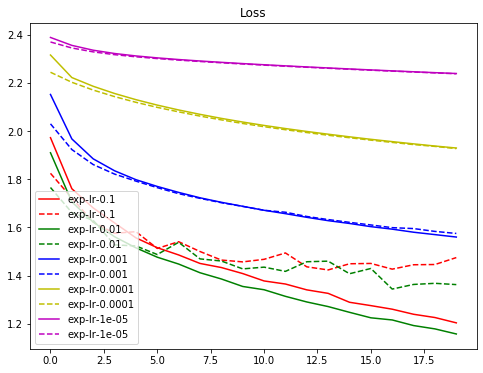

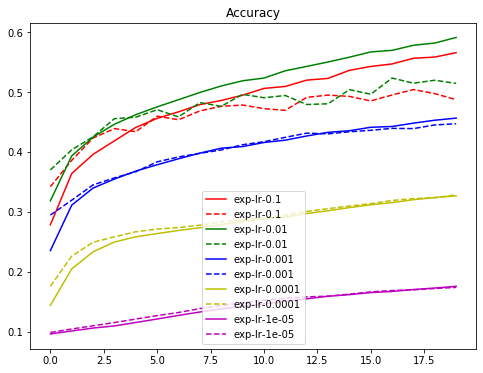

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()